In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


- these are the states of india according to the crop production that are to be considered

In [39]:
crop.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

### the seasons to be considered are

- karif: season in the Indian subcontinent that starts in June and ends in October. It is the rainy season, and the monsoon rains provide the moisture needed for crops to grow

- whole year: most crops require specific environmental conditions to thrive. Some possible examples include certain perennial fruits like bananas or pineapples, or crops grown in controlled environments like greenhouses.

- rabi:follows kharif, from October to March. Rabi crops like wheat, barley, oats, gram, mustard, and linseed thrive in cooler temperatures

- summer:In temperate climates, some vegetables like tomatoes, peppers, okra, and melons can be grown in summer

- autumn : Similar to temperate summer crops, autumn offers options like apples, pears, grapes, pumpkins, and squash in colder climates

In [41]:
crop.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

- 2000 - 2015 time period is considerd(15 years)

In [42]:
crop.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

- the above is the list of crops grown in india during the seasons mentioned above 

In [43]:
crop.isna().sum()
#there are null values in production only

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<Axes: >

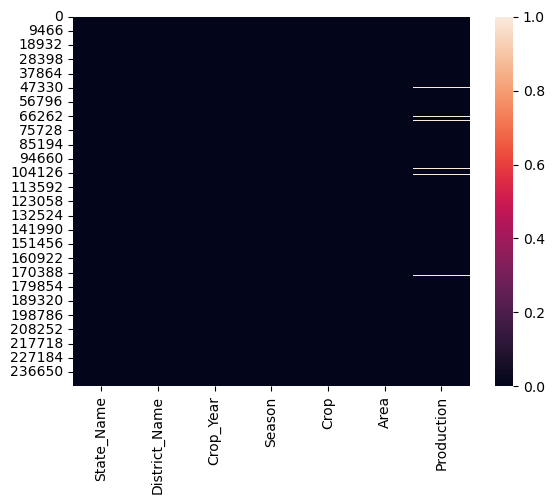

In [71]:
sns.heatmap(crop.isna())

In [72]:
crop['Production'].fillna(crop['Production'].mean(), inplace=True)

In [73]:
crop.duplicated().sum()
#no duplicated

0

In [74]:
crop["Production"].nunique()
#there 51627 values for production in crops

51628

In [86]:
crop.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State_Name,246091,33,Uttar Pradesh,33306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District_Name,246091,646,BIJAPUR,945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Year,246091.0,NaN,NaN,NaN,2005.643018,4.952164,1997.0,2002.0,2006.0,2010.0,2015.0
Season,246091,6,Kharif,95951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop,246091,124,Rice,15104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,246091.0,NaN,NaN,NaN,12002.820864,50523.404019,0.04,80.0,582.0,4392.0,8580100.0
Production,246091.0,NaN,NaN,NaN,582503.442251,16935985.596992,0.0,91.0,788.0,8000.0,1250800000.0


- there are 33 unique states and 646 districts considered in the data set
- UP is the state with highest frequency 
- considering districts its bijapur also known as vijayapur which is in karnataka
- kharif is season with most frequency
- rice is cultivated more in india being rice as the prime and important food of indians
- considering the area and production we can say that there are differences in mean and median values telling there are high chances for outliers
- 

# seasonal analysis

In [75]:
# we came up with the 6 seasons above now lets make a detailed analysis


In [76]:
season_grp=crop.groupby("Season")

<Axes: xlabel='Season', ylabel='count'>

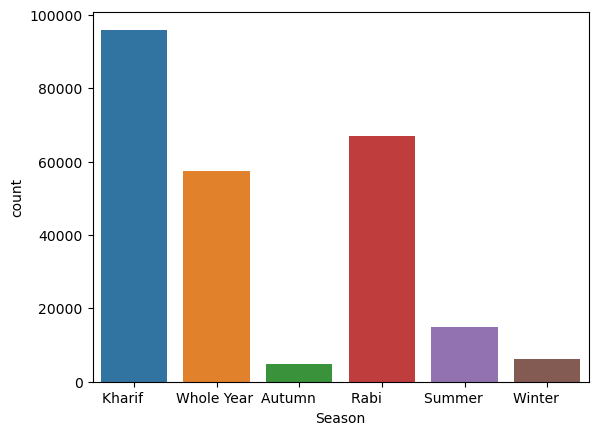

In [77]:
sns.countplot(data=crop,x="Season")

- kharif are high in number compared to other crops

- followed by rabi crops and then whole year crops

- autumn crops and winter crops are less may be because of the temprature fluctuations which wont be enough for each crop to grow

- even the count is less there are summer crops that grow in india

In [78]:
kharif=season_grp.get_group('Kharif     ')
kharif

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.0
11,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Other Kharif pulses,2.0,1.0
...,...,...,...,...,...,...,...
246066,West Bengal,PURULIA,2014,Kharif,Other Kharif pulses,79.0,39.0
246067,West Bengal,PURULIA,2014,Kharif,Sannhamp,171.0,727.0
246068,West Bengal,PURULIA,2014,Kharif,Soyabean,18.0,7.0
246069,West Bengal,PURULIA,2014,Kharif,Sunflower,46.0,42.0


In [79]:
kharif["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Cotton(lint)', 'Dry chillies', 'Groundnut',
       'Horse-gram', 'Jowar', 'Korra', 'Maize', 'Moong(Green Gram)',
       'Ragi', 'Sugarcane', 'Sunflower', 'Tobacco', 'Masoor', 'Sesamum',
       'Urad', 'Gram', 'Onion', 'other misc. pulses', 'Samai',
       'Small millets', 'Soyabean', 'Mesta', 'Cowpea(Lobia)',
       'other oilseeds', 'Brinjal', 'Coriander', 'Grapes', 'Lemon',
       'Linseed', 'Mango', 'Papaya', 'Pome Granet', 'Sapota', 'Tomato',
       'Turmeric', 'Cabbage', 'Cashewnut', 'Potato', 'Sweet potato',
       'Niger seed', 'Tapioca', 'Dry ginger', 'Safflower', 'Varagu',
       'Jute', 'Orange', 'Blackgram', 'Sannhamp', 'Guar seed', 'Coconut ',
       'Banana', 'Moth', 'Other Cereals & Millets', 'Pulses total',
       'Peas & beans (Pulses)', 'Ginger', 'Garlic', 'Cond-spcs other',
       'Wheat', 'Barley', 'Rapeseed &Mustard', 'Paddy', 'Black pepper',
       'Total foodgrain', 'Kap

In [80]:
kharif["Crop"].nunique()

82

In [81]:
# there are 82 varieties of crops that grow in kharif season

In [97]:
kharif["Crop"].value_counts().head(20)
# these are the 30 main crops cultivated mainly in regions

Maize                  7320
Rice                   6878
Arhar/Tur              6798
Sesamum                6493
Urad                   5947
Moong(Green Gram)      5577
Groundnut              5359
Jowar                  5044
Bajra                  4672
Small millets          4155
Cotton(lint)           3974
Other Kharif pulses    3651
Soyabean               3103
Castor seed            2957
Sunflower              2577
Ragi                   2448
Horse-gram             2104
Niger seed             1932
Mesta                  1705
Dry ginger             1372
Name: Crop, dtype: int64

In [98]:
kharif["Crop"].value_counts().tail(20)


Bean                  20
Coconut               17
Cardamom              17
Arecanut              16
Black pepper          15
Safflower             14
Grapes                12
Jute & mesta          12
Colocosia             11
Cond-spcs other       10
Ricebean (nagadal)    10
Jobster                9
Perilla                9
Rajmash Kholar         9
Kapas                  8
Tea                    8
Coriander              8
Wheat                  7
Linseed                7
Khesari                1
Name: Crop, dtype: int64

In [89]:
top_crops_kharif = kharif['Crop'].value_counts().head(20)

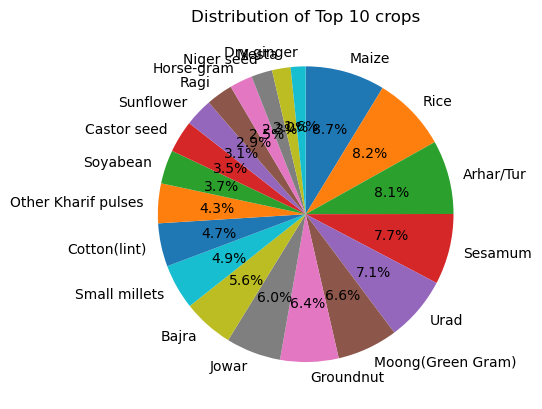

In [91]:
plt.pie(top_crops_kharif, autopct="%.1f%%", labels=top_crops_kharif.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 crops')
plt.show()

- maize , rice and tur are the main and mostly cultivated crops
- followed by sesamum urad moong ground nut jowar bajra

In [95]:
low_crops_kharif = kharif['Crop'].value_counts().tail(20)

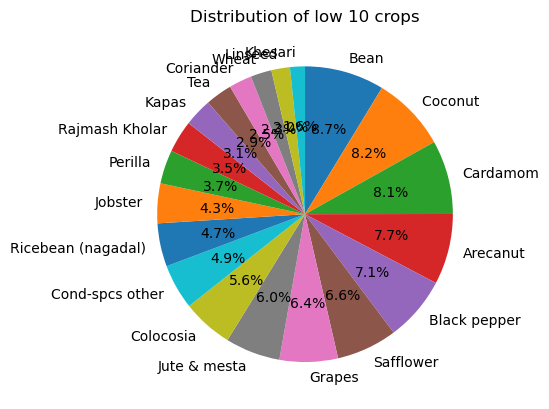

In [96]:
plt.pie(top_crops_kharif, autopct="%.1f%%", labels=low_crops_kharif.index, startangle=90, counterclock=False)
plt.title('Distribution of low 10 crops')
plt.show()

- kesari linseed wheat coriander are least cultivated tea
- tea is also a least cultivated crop

In [111]:
state_kharif=kharif["State_Name"].value_counts()
state_kharif

Uttar Pradesh                  14538
Madhya Pradesh                  9267
Karnataka                       8065
Maharashtra                     7275
Bihar                           5888
Rajasthan                       5618
Tamil Nadu                      4751
Chhattisgarh                    4601
Gujarat                         4248
Andhra Pradesh                  4232
Assam                           4214
Haryana                         2778
Nagaland                        2538
Telangana                       2367
West Bengal                     2365
Uttarakhand                     2296
Odisha                          2173
Punjab                          1639
Himachal Pradesh                1410
Meghalaya                       1038
Arunachal Pradesh                890
Jammu and Kashmir                777
Tripura                          736
Mizoram                          523
Sikkim                           422
Manipur                          385
Puducherry                       328
K

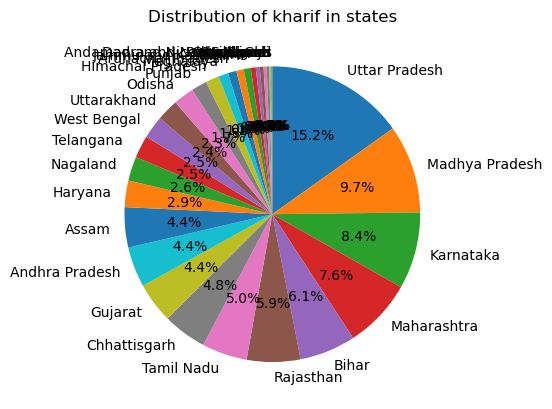

In [113]:
plt.pie(state_kharif, autopct="%.1f%%", labels=state_kharif.index, startangle=90, counterclock=False)
plt.title('Distribution of kharif in states')
plt.show()

- from the graph its visible that up is the main producers of kharif followed by madhya pradesh,karnataka and maharashta
- when compared to poverty bihar is in the top in india , but still bihar is coming in the top producers of india which tells us farming may be their main profession
- jharkand is the least producing state followed by andaman and chandigarh

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

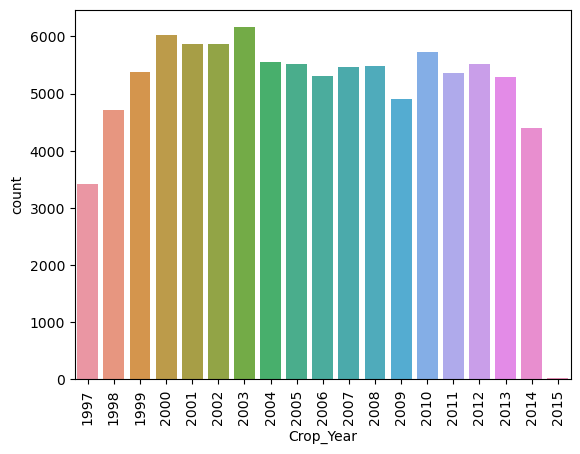

In [116]:
sns.countplot(data=kharif,x="Crop_Year")
plt.xticks(rotation=90)

- 2004 is the most yeild year for kharif
- followed by 2000 then 2001 and 2002
- the least yeild year is 1997

In [107]:
rabi=season_grp.get_group('Rabi       ')

In [108]:
rabi

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
66,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Arecanut,944.0,1610.00
67,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Black pepper,23.0,8.50
68,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Cashewnut,1000.5,260.50
69,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Dry chillies,12.0,25.00
70,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Dry ginger,7.0,9.64
...,...,...,...,...,...,...,...
246080,West Bengal,PURULIA,2014,Rabi,Potato,477.0,9995.00
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.00
246082,West Bengal,PURULIA,2014,Rabi,Safflower,54.0,37.00
246083,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.00


In [117]:
rabi["Crop"].nunique()
#there are 68 unique crops

68

In [118]:
rabi['Crop'].value_counts()

Wheat                7520
Gram                 7074
Rapeseed &Mustard    6978
Linseed              4335
Masoor               4096
                     ... 
Papaya                  4
Cashewnut               3
Mesta                   3
Sannhamp                2
Moth                    1
Name: Crop, Length: 68, dtype: int64

In [119]:
rabi_crop_top=rabi['Crop'].value_counts().head(20)

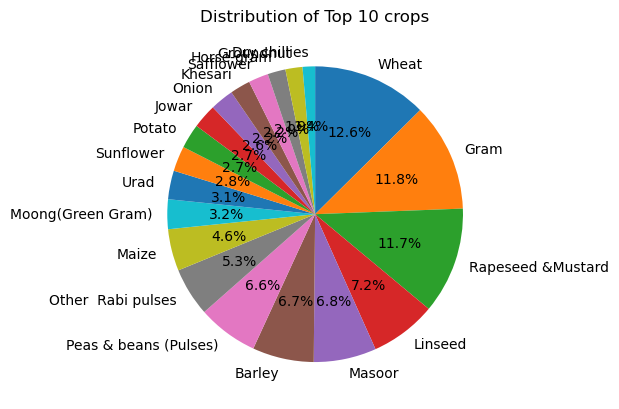

In [120]:
plt.pie(rabi_crop_top, autopct="%.1f%%", labels=rabi_crop_top.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 crops')
plt.show()

- wheat is the most cultivated in rabi followed by gram mustard linseed masoor etc

In [124]:
rabi_crop_low=rabi['Crop'].value_counts().tail(20)
rabi_crop_low

Lentil                 31
Oilseeds total         29
Pulses total           27
Samai                  20
Sugarcane              13
Varagu                 13
Total foodgrain        13
Paddy                  13
Tapioca                 9
Korra                   9
Rajmash Kholar          9
Jute                    9
Cond-spcs other         8
Other Kharif pulses     8
Dry ginger              5
Papaya                  4
Cashewnut               3
Mesta                   3
Sannhamp                2
Moth                    1
Name: Crop, dtype: int64

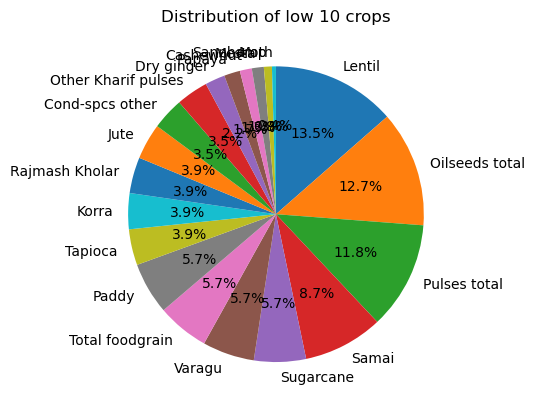

In [154]:
plt.pie(rabi_crop_low, autopct="%.1f%%", labels=rabi_crop_low.index, startangle=90, counterclock=False)
plt.title('Distribution of low 10 crops')
plt.show()

-moth is the least cultivated followed by sannahamp mesta cashewnut


In [127]:
state_rabi=rabi["State_Name"].value_counts()

In [128]:
state_rabi

Uttar Pradesh                  12003
Bihar                           6465
Karnataka                       5577
Madhya Pradesh                  5560
Assam                           4153
Maharashtra                     3824
Andhra Pradesh                  3516
West Bengal                     3266
Chhattisgarh                    3209
Rajasthan                       2999
Telangana                       2198
Uttarakhand                     1701
Haryana                         1693
Gujarat                         1644
Odisha                          1456
Punjab                          1251
Nagaland                        1244
Himachal Pradesh                 794
Jharkhand                        741
Tamil Nadu                       679
Jammu and Kashmir                657
Meghalaya                        647
Tripura                          544
Arunachal Pradesh                264
Mizoram                          255
Sikkim                           251
Puducherry                       201
M

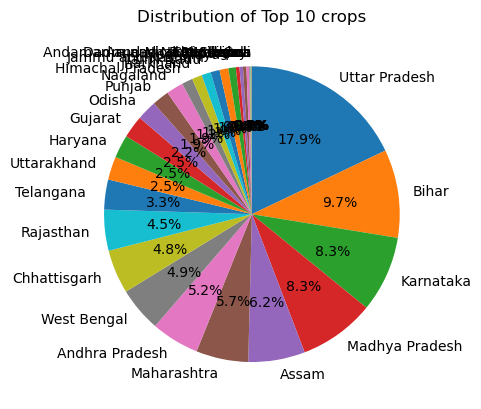

In [129]:
plt.pie(state_rabi, autopct="%.1f%%", labels=state_rabi.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 crops')
plt.show()

- up the highest producers of rabi followed by bihar
- chandigarh the least producers followed by dadra and nagara and andaman

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

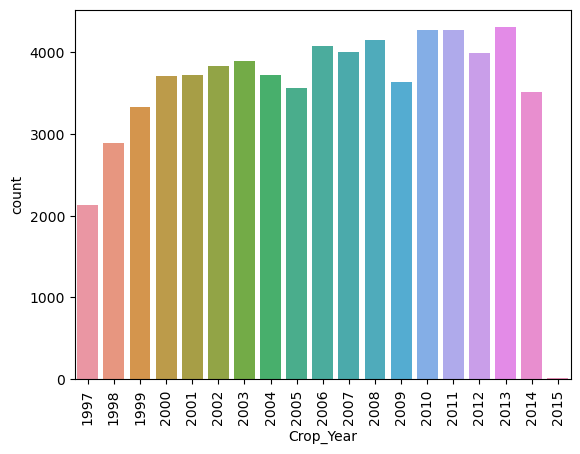

In [130]:
sns.countplot(data=rabi,x="Crop_Year")
plt.xticks(rotation=90)

- for rabi crops 2013 is the most yileded year followed by 2010 and 2011
- least yield year is 1997

In [132]:
autumn=season_grp.get_group('Autumn     ')

In [133]:
autumn

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
64,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Rice,3.50,10.00
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.40,41.75
111,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Autumn,Rice,6791.00,20118.00
112,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Autumn,Sugarcane,73.33,889.20
185,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Autumn,Rice,1595.50,3788.00
...,...,...,...,...,...,...,...
246056,West Bengal,PURULIA,2014,Autumn,Maize,6317.00,13337.00
246057,West Bengal,PURULIA,2014,Autumn,Ragi,112.00,44.00
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246059,West Bengal,PURULIA,2014,Autumn,Sesamum,170.00,87.00


In [141]:
autumn["State_Name"].value_counts()

Odisha                         2197
Bihar                           860
West Bengal                     650
Assam                           562
Jharkhand                       293
Kerala                          221
Meghalaya                        81
Manipur                          66
Maharashtra                       7
Andaman and Nicobar Islands       6
Puducherry                        6
Name: State_Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Jharkhand'),
  Text(4, 0, 'Kerala'),
  Text(5, 0, 'Maharashtra'),
  Text(6, 0, 'Manipur'),
  Text(7, 0, 'Meghalaya'),
  Text(8, 0, 'Odisha'),
  Text(9, 0, 'Puducherry'),
  Text(10, 0, 'West Bengal')])

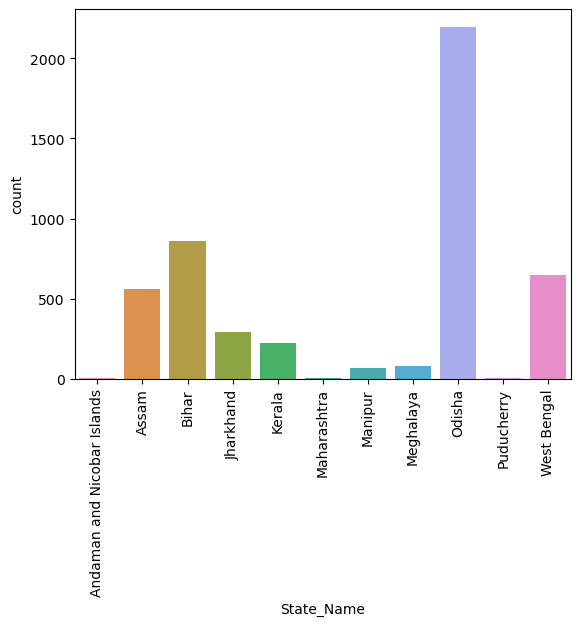

In [138]:
sns.countplot(data=autumn,x="State_Name")
plt.xticks(rotation=90)

- odisha is the highest procers in autumn crops followed by bihar

In [142]:
autumn["Crop"].value_counts()

Rice                     2091
Maize                     934
Groundnut                 379
Ragi                      375
Sesamum                   312
Urad                      291
Moong(Green Gram)         190
Paddy                     138
Jute                      114
Dry chillies               41
Arhar/Tur                  18
Small millets               9
Sannhamp                    6
Potato                      6
Sugarcane                   6
Peas & beans (Pulses)       6
Dry ginger                  6
Banana                      6
Turmeric                    6
Soyabean                    5
Onion                       4
Jowar                       3
Cotton(lint)                1
Sweet potato                1
Tapioca                     1
Name: Crop, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Sugarcane'),
  Text(2, 0, 'Paddy'),
  Text(3, 0, 'Maize'),
  Text(4, 0, 'Ragi'),
  Text(5, 0, 'Dry chillies'),
  Text(6, 0, 'Jute'),
  Text(7, 0, 'Onion'),
  Text(8, 0, 'Turmeric'),
  Text(9, 0, 'Banana'),
  Text(10, 0, 'Dry ginger'),
  Text(11, 0, 'Peas & beans (Pulses)'),
  Text(12, 0, 'Potato'),
  Text(13, 0, 'Sesamum'),
  Text(14, 0, 'Soyabean'),
  Text(15, 0, 'Cotton(lint)'),
  Text(16, 0, 'Sweet potato'),
  Text(17, 0, 'Tapioca'),
  Text(18, 0, 'Arhar/Tur'),
  Text(19, 0, 'Groundnut'),
  Text(20, 0, 'Urad'),
  Text(21, 0, 'Moong(Green Gram)'),
  Text(22, 0, 'Sannhamp'),
  Text(23, 0, 'Small millets'),
  Text(24, 0, 'Jowar')])

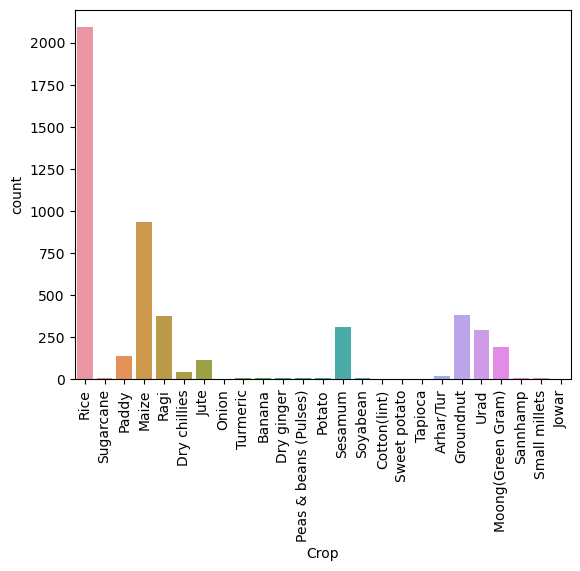

In [144]:
sns.countplot(data=autumn,x="Crop")
plt.xticks(rotation=90)

- rice is the most produced autumn crop followed by maize

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

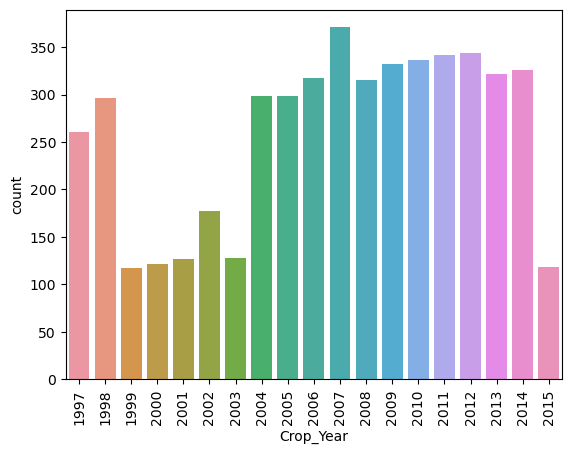

In [145]:
sns.countplot(data=autumn,x="Crop_Year")
plt.xticks(rotation=90)

- 2006 is the most productive year followed by 2012,2011,2010
- 1999 is the least produced year for autumn
- kharif and rabi are mainly produced in india and least produced year for them was 1997

In [148]:
whole_year=season_grp.get_group('Whole Year ')
whole_year

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.0
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.0
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.0
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.0


In [149]:
whole_year["Crop"].nunique()

105

In [150]:
wholeyear_crop_low=whole_year['Crop'].value_counts().tail(20)
wholeyear_crop_low

Moth                   21
Cashewnut Processed    21
Safflower              20
Atcanut (Raw)          20
Arcanut (Processed)    20
Blackgram              19
Beet Root              16
Ber                    11
Peas  (vegetable)      11
other fibres           10
Turnip                  8
Jute & mesta            8
Coffee                  6
Pear                    6
Plums                   6
Litchi                  6
Kapas                   4
Apple                   4
Peach                   4
Other Dry Fruit         1
Name: Crop, dtype: int64

In [153]:
wholeyear_crop_top=whole_year['Crop'].value_counts().head(20)
wholeyear_crop_top

Sugarcane       6297
Potato          4165
Dry chillies    4104
Onion           3985
Turmeric        3676
Sweet potato    3253
Coriander       2830
Banana          2815
Garlic          2724
Tobacco         2115
Coconut         1968
Dry ginger      1615
Sannhamp        1468
Arecanut        1443
Tapioca         1282
Cashewnut       1021
Black pepper     801
Guar seed        766
Sesamum          712
Cardamom         410
Name: Crop, dtype: int64

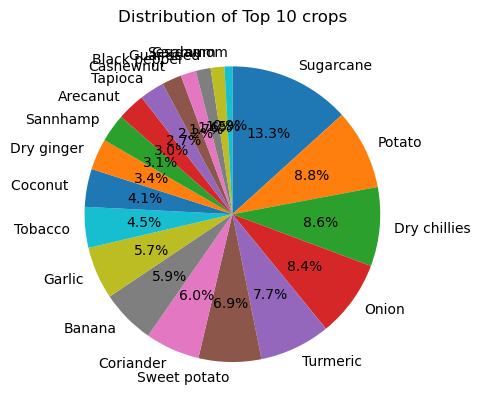

In [155]:
plt.pie(wholeyear_crop_top, autopct="%.1f%%", labels=wholeyear_crop_top.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 crops')
plt.show()

- sugarcane the most followed by potatoes drychillies and onion


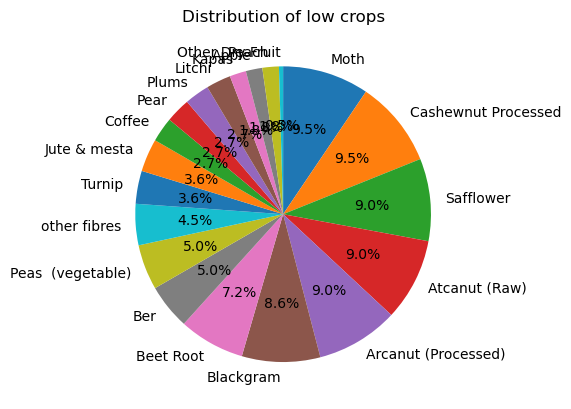

In [157]:
plt.pie(wholeyear_crop_low, autopct="%.1f%%", labels=wholeyear_crop_low.index, startangle=90, counterclock=False)
plt.title('Distribution of low crops')
plt.show()

- least producers are other dry fruits,peach , apple , kapas, litchi etc

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014')])

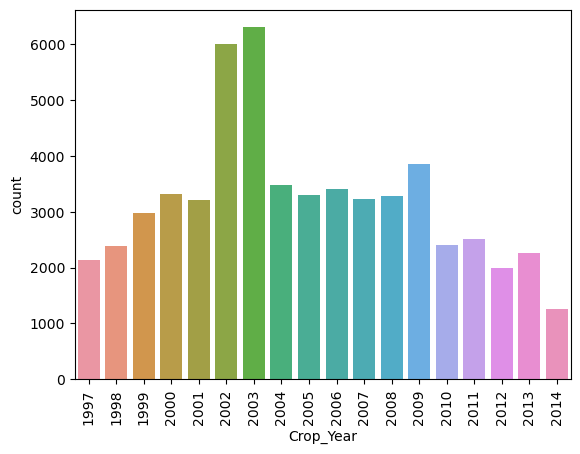

In [159]:
sns.countplot(data=whole_year,x="Crop_Year")
plt.xticks(rotation=90)

- 2003 is the highest followed by 2003
- 2014 is the lowest followed by 1997

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

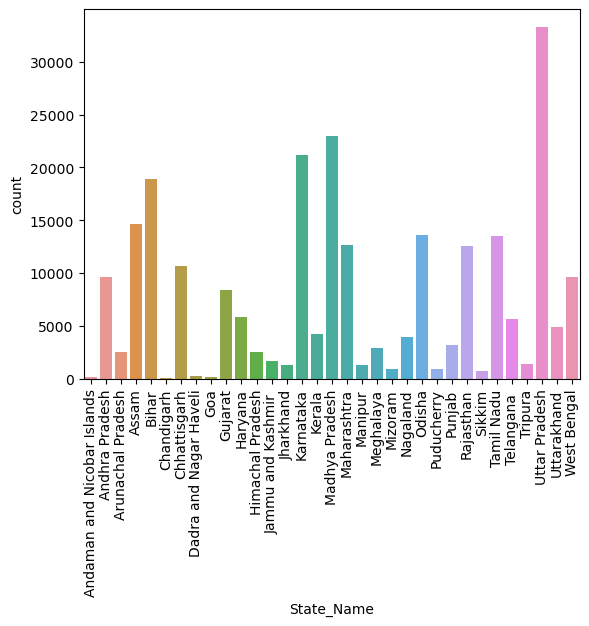

In [160]:
sns.countplot(data=crop,x="State_Name")
plt.xticks(rotation=90)

- uttarpradesh the most and chandigarh the least

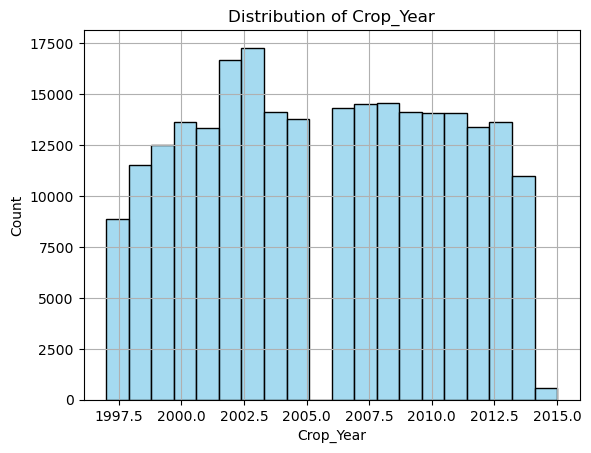

In [161]:
sns.histplot(crop['Crop_Year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Crop_Year')
plt.xlabel('Crop_Year')
plt.ylabel('Count')
plt.grid()
plt.show()

- The most frequent years for crop harvesting activities are 2003, 2002, 2008, 2007, and 2006. From 2000 to 2013, there was a consistent high number of harvesting activities. However, in 2015, the count decreased significantly, possibly due to incomplete data or a genuine decrease in agricultural activities.

In [163]:
crop.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006945
Area,-0.026022,1.000000,0.040545
Production,0.006945,0.040545,1.000000


<Axes: >

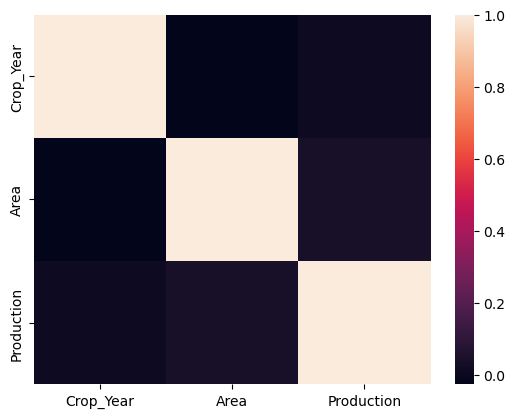

In [164]:
sns.heatmap(crop.corr())

- The correlation coefficients are close to zero, indicating no strong linear relationship between Crop Year, Area, and Production, but a low correlation doesn't necessarily indicate no relationship

# CONCLUSION

- 1997 is the most least produced for most crops the reasons may be the severe drought that affected the main agricultural areas like uttar pradesh , bihar etc and the elnino affect which affected the weather in india . the monsoon arrived late and the rain was not significant for the agricultural industry

- bihar is coming in the top list of producers by states in most season crops but still bihar is facing the top in poverty list in india which half the population suffers from deprivation across various indicators like health, education, and living standards.,Over 70% of Bihar's population relies on agriculture for their livelihood. While crop production is high, factors like low productivity,focus on subsistence crops,caste and landownership,gender inequality,poor infrastructure , weak governance etc

- chandigarh is least contributed to agriculture in india mainly because being a union territory it has very limited land area for cultuvation and chandigarh mainly focuses on administrative and commercial center and also they recieve low rainfall compared to other areas

- andaman and nicobar islands least contributed to agriculture because of island geography and mainly focused on tourism and transportation challenges also are faced because the transportations to and fro island will become costly

- dadra and nagar haveli also least contributors because being union territory limited land area and a sizeable portion is covered by forests and also it has witnessed significant industrial development

- It's important to remember that these regions contribute to India's food security in other ways. Chandigarh plays a vital role in administrative and technological aspects of agriculture. Dadra and Nagar Haveli has a growing horticulture sector, including fruits and vegetables. Andaman and Nicobar Islands contribute to niche agricultural products like coconuts and spices.


- Kharif is the most frequent season, followed by Rabi and Whole Year, indicating significant crop cultivation.

- 